In [2]:
import ffmpeg

def get_duration(file_path):
    probe = ffmpeg.probe(file_path)
    return float(probe['format']['duration'])

audio_file = "/home/frozenwolf/Desktop/indiaai_subset/test/bengali/844424930403249-711-f.m4a"
duration = get_duration("your_file.m4a")


Error: ffprobe error (see stderr output for detail)

In [1]:
import os

# test_audio = "testkn_audio/kb_data_clean_m4a/tamil/test_known/audio"
# train_val_audio = "train_audio/kb_data_clean_m4a/sanskrit/train/audio" # train, valid
# transcript_files = "transcripts_n2w/kb_data_clean_m4a/tamil/train/transcription_n2w.txt" # test_known, test, valid, train


# noisy_audio = "noisy/testkn_audio/kb_data_noisy_m4a/tamil/test_known/audio" # test_known
# noisy_transcription_files = "noisy/kb_data_noisy_m4a/tamil/test_known" # test_known, test, valid


test_audio = "testkn_audio/kb_data_clean_m4a/"
train_audio = "train_audio/kb_data_clean_m4a/"
val_audio = "train_audio/kb_data_clean_m4a/" 
transcript_files = "transcripts_n2w/kb_data_clean_m4a" # test_known, test, valid, train


noisy_audio = "noisy/testkn_audio/kb_data_noisy_m4a/" # test_known
noisy_transcription_files = "noisy/kb_data_noisy_m4a" # test_known, test, valid



train_path = {}
test_path = {}
noisy_test_path = {}

check_if_exists = True

for lang in os.listdir(test_audio):
    for dict_, audio_path, transcript_path, type_ in zip(
        [train_path, test_path, noisy_test_path],
        [train_audio, test_audio, noisy_audio],
        [transcript_files, transcript_files, noisy_transcription_files],
        ["train", "test_known", "test_known"],
    ):
        print(f"Processing {lang} {type_} data...")
        audio_path = os.path.join(audio_path, lang, type_, "audio")
        dict_[lang] = {}
        dict_[lang]["audio"] = sorted([os.path.join(audio_path, file) for file in os.listdir(audio_path)])
        transcript = os.path.join(transcript_path, lang, type_, "transcription_n2w.txt")
        dict_[lang]["transcript"] = {}
        for i in open(transcript, 'r').readlines():
            k, v = tuple(i.lstrip().rstrip().split('\t'))
            dict_[lang]["transcript"][os.path.join(audio_path, k)] = v
            
        count = 0
        if check_if_exists:
            for i in dict_[lang]["audio"]:
                if i not in dict_[lang]["transcript"]:
                    print(f"Audio file {i} not found in transcript.")
                    count+=1
                    
        # print(f"Total {count} files not found in transcript.")
            
            
            
        
        
      

Processing odia train data...
Processing odia test_known data...
Processing odia test_known data...
Processing malayalam train data...
Processing malayalam test_known data...
Processing malayalam test_known data...
Processing marathi train data...
Processing marathi test_known data...
Processing marathi test_known data...
Processing sanskrit train data...
Processing sanskrit test_known data...
Processing sanskrit test_known data...
Processing kannada train data...
Processing kannada test_known data...
Processing kannada test_known data...
Processing bengali train data...
Processing bengali test_known data...
Processing bengali test_known data...
Processing tamil train data...
Processing tamil test_known data...
Processing tamil test_known data...
Processing telugu train data...
Processing telugu test_known data...
Processing telugu test_known data...
Processing urdu train data...
Processing urdu test_known data...
Processing urdu test_known data...
Processing punjabi train data...
Proc

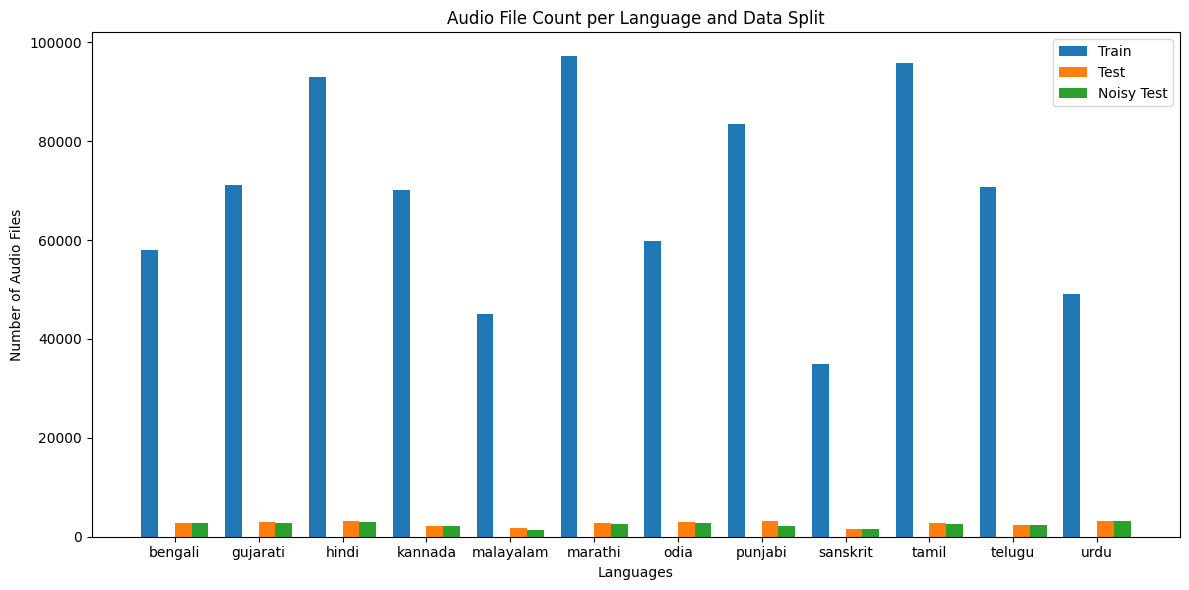

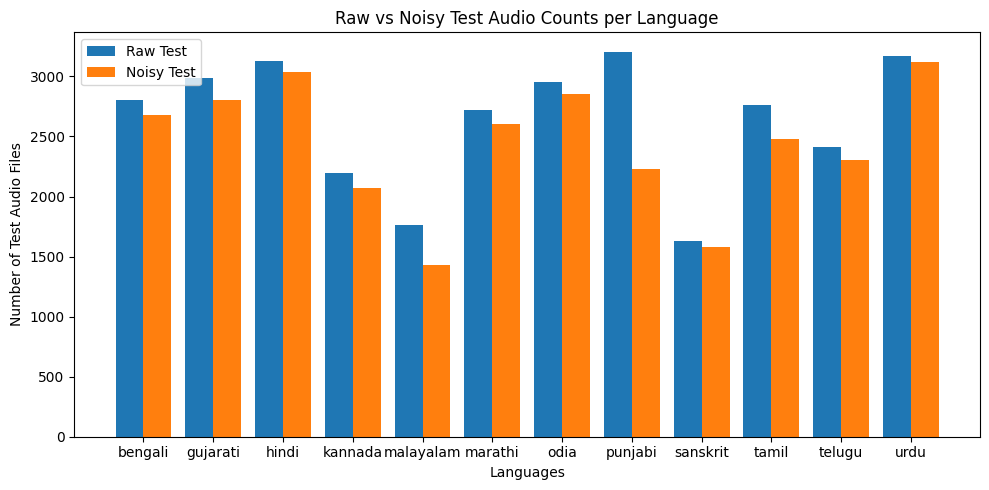

In [2]:
import matplotlib.pyplot as plt

# Assuming train_path, val_path, test_path, noisy_test_path are already populated

def get_audio_counts(data_dict):
    counts = {}
    for lang, data in data_dict.items():
        counts[lang] = len(data['audio'])
    return counts

train_counts = get_audio_counts(train_path)
test_counts = get_audio_counts(test_path)
noisy_test_counts = get_audio_counts(noisy_test_path)

langs = sorted(set(train_counts) | set(test_counts) | set(noisy_test_counts))

# Plot 1: Train / Val / Test / Noisy Test Counts
x = range(len(langs))
bar_width = 0.2

plt.figure(figsize=(12, 6))
plt.bar([i - 1.5 * bar_width for i in x], [train_counts.get(lang, 0) for lang in langs], width=bar_width, label='Train')
plt.bar([i + 0.5 * bar_width for i in x], [test_counts.get(lang, 0) for lang in langs], width=bar_width, label='Test')
plt.bar([i + 1.5 * bar_width for i in x], [noisy_test_counts.get(lang, 0) for lang in langs], width=bar_width, label='Noisy Test')

plt.xlabel('Languages')
plt.ylabel('Number of Audio Files')
plt.title('Audio File Count per Language and Data Split')
plt.xticks(ticks=x, labels=langs)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Raw vs Noisy (Test Only)
plt.figure(figsize=(10, 5))
x = range(len(langs))
plt.bar([i - 0.2 for i in x], [test_counts.get(lang, 0) for lang in langs], width=0.4, label='Raw Test')
plt.bar([i + 0.2 for i in x], [noisy_test_counts.get(lang, 0) for lang in langs], width=0.4, label='Noisy Test')

plt.xlabel('Languages')
plt.ylabel('Number of Test Audio Files')
plt.title('Raw vs Noisy Test Audio Counts per Language')
plt.xticks(ticks=x, labels=langs)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
get_audio_counts(noisy_test_path)

{'odia': 2850,
 'malayalam': 1427,
 'marathi': 2606,
 'sanskrit': 1583,
 'kannada': 2074,
 'bengali': 2678,
 'tamil': 2480,
 'telugu': 2302,
 'urdu': 3118,
 'punjabi': 2226,
 'hindi': 3034,
 'gujarati': 2804}

In [4]:
# 1000 noisy train
# 6200 train

# 200 val (from train since val path is empty)
# 200 noisy (from noisy test)

# 200 test
# 200 noisy test (from noisy test)

nosiy_train_set = {}
nosiy_test_set = {}
noisy_val_set = {}

for lang in noisy_test_path:
    nosiy_train_set[lang] = {}
    nosiy_test_set[lang] = {}
    noisy_val_set[lang] = {}
    nosiy_train_set[lang]["audio"] = noisy_test_path[lang]["audio"][:1000]
    nosiy_train_set[lang]["transcript"] = noisy_test_path[lang]["transcript"]
    nosiy_test_set[lang]["audio"] = noisy_test_path[lang]["audio"][1000:1200]
    nosiy_test_set[lang]["transcript"] = noisy_test_path[lang]["transcript"]
    noisy_val_set[lang]["audio"] = noisy_test_path[lang]["audio"][1200:1400]
    noisy_val_set[lang]["transcript"] = noisy_test_path[lang]["transcript"]
    
train_set = {}
val_set = {}

for lang in train_path:
    train_set[lang] = {}
    val_set[lang] = {}
    train_set[lang]["audio"] = train_path[lang]["audio"][:6200]
    train_set[lang]["transcript"] = train_path[lang]["transcript"]
    val_set[lang]["audio"] = train_path[lang]["audio"][6200:6400]
    val_set[lang]["transcript"] = train_path[lang]["transcript"]
    
test_set = {}
for lang in test_path:
    test_set[lang] = {}
    test_set[lang]["audio"] = test_path[lang]["audio"][:200]
    test_set[lang]["transcript"] = test_path[lang]["transcript"]
   
### merge nosiy train and train
for lang in train_set:
    nosiy_train_set[lang]["audio"] += train_set[lang]["audio"]
    nosiy_train_set[lang]["transcript"].update(train_set[lang]["transcript"])
    
import pickle
with open("dataset.pkl", "wb") as f:
    pickle.dump({
        "train": nosiy_train_set,
        "val": val_set,
        "test": test_set,
        "noisy_val": noisy_val_set,
        "noisy_test": nosiy_test_set
    }, f)


In [5]:
ds = pickle.load(open("dataset.pkl", "rb"))
for v in ds.values():
    print(get_audio_counts(v))
    

{'odia': 7200, 'malayalam': 7200, 'marathi': 7200, 'sanskrit': 7200, 'kannada': 7200, 'bengali': 7200, 'tamil': 7200, 'telugu': 7200, 'urdu': 7200, 'punjabi': 7200, 'hindi': 7200, 'gujarati': 7200}
{'odia': 200, 'malayalam': 200, 'marathi': 200, 'sanskrit': 200, 'kannada': 200, 'bengali': 200, 'tamil': 200, 'telugu': 200, 'urdu': 200, 'punjabi': 200, 'hindi': 200, 'gujarati': 200}
{'odia': 200, 'malayalam': 200, 'marathi': 200, 'sanskrit': 200, 'kannada': 200, 'bengali': 200, 'tamil': 200, 'telugu': 200, 'urdu': 200, 'punjabi': 200, 'hindi': 200, 'gujarati': 200}
{'odia': 200, 'malayalam': 200, 'marathi': 200, 'sanskrit': 200, 'kannada': 200, 'bengali': 200, 'tamil': 200, 'telugu': 200, 'urdu': 200, 'punjabi': 200, 'hindi': 200, 'gujarati': 200}
{'odia': 200, 'malayalam': 200, 'marathi': 200, 'sanskrit': 200, 'kannada': 200, 'bengali': 200, 'tamil': 200, 'telugu': 200, 'urdu': 200, 'punjabi': 200, 'hindi': 200, 'gujarati': 200}


In [6]:
### copy all the audio files to this path: /home/frozenwolf/Desktop/indiaai_subset
import shutil
import os
from tqdm.auto import tqdm

def copy_files(data_dict, base_path):
    for lang, data in tqdm(data_dict.items()):
        lang_path = os.path.join(base_path, lang)
        os.makedirs(lang_path, exist_ok=True)
        for audio_file in data['audio']:
            shutil.copy(audio_file, lang_path)

copy_files(nosiy_train_set, "/home/frozenwolf/Desktop/indiaai_subset/train")
copy_files(val_set, "/home/frozenwolf/Desktop/indiaai_subset/val")
copy_files(test_set, "/home/frozenwolf/Desktop/indiaai_subset/test")
copy_files(noisy_val_set, "/home/frozenwolf/Desktop/indiaai_subset/val")
copy_files(nosiy_test_set, "/home/frozenwolf/Desktop/indiaai_subset/test")

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

In [7]:
import pickle

dataset = pickle.load(open("dataset.pkl", "rb"))
for ds in dataset.keys():
    for lang in dataset[ds]:
        for idx in range(len(dataset[ds][lang]["audio"])):
            dataset[ds][lang]["audio"][idx] = dataset[ds][lang]["audio"][idx].split("/")[-1]
            
        ### modify transcript key:
        dataset[ds][lang]["transcript"] = {i.split("/")[-1]: dataset[ds][lang]["transcript"][i] for i in dataset[ds][lang]["transcript"]}
        
pickle.dump(dataset, open("dataset.pkl", "wb"))

In [1]:
import pickle
dataset = pickle.load(open("dataset.pkl", "rb"))

In [9]:
dataset['noisy_val']['malayalam']

{'audio': ['844424931307184-985-m.m4a',
  '844424931307191-985-m.m4a',
  '844424931307198-985-m.m4a',
  '844424931307203-985-m.m4a',
  '844424931307222-985-m.m4a',
  '844424931307225-985-m.m4a',
  '844424931311114-1132-m.m4a',
  '844424931311125-1132-m.m4a',
  '844424931311263-1145-m.m4a',
  '844424931313569-1132-m.m4a',
  '844424931313610-1132-m.m4a',
  '844424931316345-985-m.m4a',
  '844424931316357-985-m.m4a',
  '844424931316364-985-m.m4a',
  '844424931316368-985-m.m4a',
  '844424931316369-985-m.m4a',
  '844424931316382-985-m.m4a',
  '844424931316383-985-m.m4a',
  '844424931316392-985-m.m4a',
  '844424931316398-985-m.m4a',
  '844424931316401-985-m.m4a',
  '844424931316402-985-m.m4a',
  '844424931316410-985-m.m4a',
  '844424931316414-985-m.m4a',
  '844424931316419-985-m.m4a',
  '844424931316423-985-m.m4a',
  '844424931316429-985-m.m4a',
  '844424931316956-420-f.m4a',
  '844424931316958-420-f.m4a',
  '844424931316975-420-f.m4a',
  '844424931316991-420-f.m4a',
  '844424931316993-420-f.

In [41]:
dataset['noisy_test']['tamil']['transcript'][dataset['noisy_test']['tamil']['audio'][0]]

'உரிய பொறிமுறைகள் இன்றி காலாவதியான மருந்துகள் தீ மூட்டி அழிக்க முற்பட்டமையால் பொதுமக்கள் பாதிப்பு'

In [31]:
sorted(train_path.keys())

['bengali',
 'gujarati',
 'hindi',
 'kannada',
 'malayalam',
 'marathi',
 'odia',
 'punjabi',
 'sanskrit',
 'tamil',
 'telugu',
 'urdu']

In [2]:
from utils import compute_bwt_new
val_perf = {'hindi': [{'rnnt_wer': 0.04037399065023375, 'rnnt_noisy_wer': 0.08181432810512929, 'rnnt_avg_wer': 0.06109415937768152, 'ctc_wer': 0.042923926901827454, 'ctc_noisy_wer': 0.09029249682068673, 'ctc_avg_wer': 0.0666082118612571}],
            'bengali': [{'rnnt_wer': 1.079849694692344, 'rnnt_noisy_wer': 1.0819221967963386, 'rnnt_avg_wer': 1.0808859457443414, 'ctc_wer': 1.0756223579145139, 'ctc_noisy_wer': 1.0723112128146453, 'ctc_avg_wer': 1.0739667853645796}]}


# compute_per_lang_bwt_fwt(val_perf, "ctc_avg_wer")

val_perf = { ### new random 4th value
    "lang1": [
        {"rnnt_wer": 0.30},  # After training on lang1
        {"rnnt_wer": 0.35},  # After training on lang2
        {"rnnt_wer": 0.30},  # After training on lang3
    ],
    "lang2": [
        {"rnnt_wer": 0.50},  # After training on lang2
        {"rnnt_wer": 0.32},  # After training on lang3
    ],
    "lang3": [
        {"rnnt_wer": 0.50},  # After training on lang3
    ],

}


compute_bwt_new(val_perf, "rnnt_wer")

{'lang1': [(2, -0.04999999999999999), (3, 0.0)], 'lang2': [], 'lang3': []}

In [6]:
import torch
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='librosa')
warnings.filterwarnings("ignore", category=FutureWarning, module='librosa')

import NeMo.nemo.collections.asr as nemo_asr

model = nemo_asr.models.ASRModel.from_pretrained("ai4bharat/indicconformer_stt_ta_hybrid_rnnt_large")
model.ctc_wer.log_prediction = False
model.wer.log_prediction = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.freeze() # inference mode
model = model.to(device) # transfer model to device



[NeMo W 2025-04-17 11:43:15 nemo_logging:349] /home/frozenwolf/miniconda3/envs/indiaai/lib/python3.10/site-packages/megatron/core/tensor_parallel/layers.py:220: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
      def forward(ctx, input, weight, bias, gradient_accumulation_fusion,
    
[NeMo W 2025-04-17 11:43:15 nemo_logging:349] /home/frozenwolf/miniconda3/envs/indiaai/lib/python3.10/site-packages/megatron/core/tensor_parallel/layers.py:250: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
      def backward(ctx, grad_output):
    


[NeMo I 2025-04-17 11:43:27 mixins:198] _setup_tokenizer: detected an aggregate tokenizer
[NeMo I 2025-04-17 11:43:27 mixins:335] Tokenizer SentencePieceTokenizer initialized with 256 tokens
[NeMo I 2025-04-17 11:43:27 mixins:335] Tokenizer SentencePieceTokenizer initialized with 256 tokens
[NeMo I 2025-04-17 11:43:27 mixins:335] Tokenizer SentencePieceTokenizer initialized with 256 tokens
[NeMo I 2025-04-17 11:43:27 mixins:335] Tokenizer SentencePieceTokenizer initialized with 256 tokens
[NeMo I 2025-04-17 11:43:27 mixins:335] Tokenizer SentencePieceTokenizer initialized with 256 tokens
[NeMo I 2025-04-17 11:43:27 mixins:335] Tokenizer SentencePieceTokenizer initialized with 256 tokens
[NeMo I 2025-04-17 11:43:27 mixins:335] Tokenizer SentencePieceTokenizer initialized with 256 tokens
[NeMo I 2025-04-17 11:43:27 mixins:335] Tokenizer SentencePieceTokenizer initialized with 256 tokens
[NeMo I 2025-04-17 11:43:27 mixins:335] Tokenizer SentencePieceTokenizer initialized with 256 tokens
[

[NeMo W 2025-04-17 11:43:33 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath:
    - /nlsasfs/home/ai4bharat/ai4bharat-pr/speechteam/indicasr_v3/manifests/nemo/vistaar_v3/train/train_tamil.json
    sample_rate: 16000
    batch_size: 8
    shuffle: false
    num_workers: 16
    pin_memory: true
    max_duration: 30.0
    min_duration: 0.2
    is_tarred: false
    tarred_audio_filepaths: null
    shuffle_n: 2048
    bucketing_strategy: synced_randomized
    bucketing_batch_size: null
    is_concat: true
    concat_sampling_technique: temperature
    concat_sampling_temperature: 1.5
    return_language_id: true
    
[NeMo W 2025-04-17 11:43:33 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration

[NeMo I 2025-04-17 11:43:33 features:289] PADDING: 0


[NeMo W 2025-04-17 11:43:34 nemo_logging:349] /home/frozenwolf/miniconda3/envs/indiaai/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
      warnings.warn(
    


[NeMo I 2025-04-17 11:43:35 rnnt:1667] Vocab size for each language: 256
[NeMo I 2025-04-17 11:43:35 rnnt_models:220] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}
[NeMo I 2025-04-17 11:43:35 rnnt_models:220] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}
[NeMo I 2025-04-17 11:43:36 rnnt_models:220] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}
[NeMo I 2025-04-17 11:43:36 hybrid_rnnt_ctc_bpe_models:105] Creating masks for multi-softmax layer.
[NeMo I 2025-04-17 11:43:36 rnnt_models:220] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}
[NeMo I 2025-04-17 11:43:37 save_restore_connector:263] Model EncDecHybridRNNTCTCBPEModel was successfully restored from /home/frozenwolf/.cache/huggingface/hub/models--ai4bharat--indicconformer_stt_ta_hybrid_rnnt_large/snapsho

In [6]:
for k,v in model.cfg.items():
    print(k, v)

sample_rate 16000
compute_eval_loss False
log_prediction True
skip_nan_grad False
model_defaults {'enc_hidden': 512, 'pred_hidden': 640, 'joint_hidden': 640}
train_ds {'manifest_filepath': ['/nlsasfs/home/ai4bharat/ai4bharat-pr/speechteam/indicasr_v3/manifests/nemo/vistaar_v3/train/train_tamil.json'], 'sample_rate': 16000, 'batch_size': 8, 'shuffle': False, 'num_workers': 16, 'pin_memory': True, 'max_duration': 30.0, 'min_duration': 0.2, 'is_tarred': False, 'tarred_audio_filepaths': None, 'shuffle_n': 2048, 'bucketing_strategy': 'synced_randomized', 'bucketing_batch_size': None, 'is_concat': True, 'concat_sampling_technique': 'temperature', 'concat_sampling_temperature': 1.5, 'return_language_id': True}
validation_ds {'manifest_filepath': ['/nlsasfs/home/ai4bharat/ai4bharat-pr/speechteam/indicasr_v3/manifests/nemo/vistaar_v3/valid_datasetwise/valid_tamil_indicvoices.json'], 'sample_rate': 16000, 'batch_size': 16, 'shuffle': False, 'use_start_end_token': False, 'num_workers': 8, 'return

In [7]:
audio = train_path['tamil']['audio'][:10]
trasncripts = [train_path['tamil']['transcript'][i] for i in audio]

In [8]:


###inference 
# model.cur_decoder = "rnnt"
# ctc_text = model.transcribe(audio, batch_size=10,logprobs=True, language_id='ta')
# print(ctc_text)


### train dataloader:
import tempfile

from NeMo.nemo.collections.asr.models.hybrid_rnnt_ctc_models import TranscribeConfig, InternalTranscribeConfig

transcribe_cfg = TranscribeConfig(
                batch_size=12,
                return_hypotheses=False,
                num_workers=0,
                channel_selector=None,
                augmentor=None,
                verbose=True,
                logprobs=True,
                language_id='ta',
            )

transcribe_cfg._internal = InternalTranscribeConfig()

tmpdir = tempfile.mkdtemp()
transcribe_cfg._internal.temp_dir = tmpdir
dataloader = model._transcribe_input_processing(audio, transcribe_cfg, trasncripts)
    

def move_to_device(batch, device):
    """
    Recursively move all tensors in `batch` to `device`.
    """
    if isinstance(batch, torch.Tensor):
        return batch.to(device)
    elif isinstance(batch, (list, tuple)):
        return [move_to_device(x, device) for x in batch]
    elif isinstance(batch, dict):
        return {k: move_to_device(v, device) for k, v in batch.items()}
    else:
        raise TypeError(f"Unsupported type: {type(batch)}")
    


[NeMo W 2025-04-17 01:37:25 nemo_logging:349] /home/frozenwolf/Desktop/indiai/NeMo/nemo/collections/asr/models/hybrid_rnnt_ctc_models.py:412: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
    	This alias will be removed in version 1.0.
      entry = {'audio_filepath': audio_file, 'duration': librosa.core.get_duration(filename=audio_file), 'text': transcript, 'lang': language_id}
    
[NeMo W 2025-04-17 01:37:25 nemo_logging:349] /home/frozenwolf/Desktop/indiai/NeMo/nemo/collections/asr/models/hybrid_rnnt_ctc_models.py:412: FutureWarning: PySoundFile failed. Trying audioread instead.
    	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
      entry = {'audio_filepath': audio_file, 'duration': librosa.core.get_duration(filename=audio_file), 'text': transcript, 'lang': language_id}
    
[NeMo W 2025-04-17 01:37:25 nemo_logging:349] /home/frozenwolf/Desktop/indiai/NeMo/nemo/collections/asr/models

[NeMo I 2025-04-17 01:37:26 collections:196] Dataset loaded with 10 files totalling 0.02 hours
[NeMo I 2025-04-17 01:37:26 collections:197] 0 files were filtered totalling 0.00 hours


In [9]:
transcribe_cfg._internal.device

In [22]:
### total trainable params
total_params = sum(p.numel() for p in model.parameters())
print(f"Total trainable params: {total_params/1e6}M")

Total trainable params: 129.250967M


In [11]:
batch  = next(iter(dataloader))
[i.shape for i in batch]

[torch.Size([10, 135984]),
 torch.Size([10]),
 torch.Size([10, 70]),
 torch.Size([10])]

In [25]:
# Freeze the first 6–8 encoder layers (more general)
from utils import save_model
save_model(model, "test.pth")

In [9]:
model

EncDecHybridRNNTCTCBPEModel(
  (preprocessor): AudioToMelSpectrogramPreprocessor(
    (featurizer): FilterbankFeatures()
  )
  (encoder): ConformerEncoder(
    (pre_encode): ConvSubsampling(
      (out): Linear(in_features=10240, out_features=512, bias=True)
      (conv): Sequential(
        (0): Conv2d(1, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (3): ReLU(inplace=True)
      )
    )
    (pos_enc): RelPositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-16): 17 x ConformerLayer(
        (norm_feed_forward1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (feed_forward1): ConformerFeedForward(
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (activation): Swish()
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_featu

In [24]:
## print trainable params
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Trainable params: {trainable_params/1e6}M")

Trainable params: 39.434391M


In [15]:
print("Params count: ", sum(p.numel() for p in model.parameters())/1e6)
print("Params count: ", sum(p.numel() for p in model.joint.parameters())/1e6)
print("Params count: ", sum(p.numel() for p in model.encoder.parameters())/1e6)

Params count:  129.250967
Params count:  4.362774
Params count:  115.111424


In [58]:
# import librosa
# import warnings
# from tqdm.auto import tqdm
# warnings.filterwarnings("ignore", category=UserWarning, module='librosa')
# warnings.filterwarnings("ignore", category=FutureWarning, module='librosa')
# warnings.filterwarnings("ignore", message=".*Audioread support is deprecated.*")
# warnings.filterwarnings("ignore", message=".*FutureWarning: get_duration() keyword argument 'filename' has bee.*")
# warnings.filterwarnings("ignore", message=".*This alias will be removed in version 1..*")
# warnings.filterwarnings("ignore", message=".*ibrosa.core.get_duration.*")

# avg_duration = 0

# for i in range(len(train_path['tamil']['audio'])):
#     duration = librosa.core.get_duration(filename=train_path['tamil']['audio'][i])
#     print(f"Duration: {duration} seconds")
#     avg_duration += duration

# print(f"Avg duration: {avg_duration/len(train_path['tamil']['audio'])} seconds")

In [ ]:

batch = move_to_device(batch, 'cuda')
model.train()
# loss, montor = model.training_step(batch, 1, ['ta']*len(batch[0]))  ## {'loss': tensor(233.4939, device='cuda:0')}

EncDecHybridRNNTCTCBPEModel(
  (preprocessor): AudioToMelSpectrogramPreprocessor(
    (featurizer): FilterbankFeatures()
  )
  (encoder): ConformerEncoder(
    (pre_encode): ConvSubsampling(
      (out): Linear(in_features=10240, out_features=512, bias=True)
      (conv): Sequential(
        (0): Conv2d(1, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (3): ReLU(inplace=True)
      )
    )
    (pos_enc): RelPositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-16): 17 x ConformerLayer(
        (norm_feed_forward1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (feed_forward1): ConformerFeedForward(
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (activation): Swish()
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_featu

In [13]:
from nemo.collections.asr.metrics.wer import WER

wer = WER(
            decoding=model.decoding,
            batch_dim_index=0,
            use_cer=model.cfg.get('use_cer', False),
            log_prediction=False,
            dist_sync_on_step=True,
        )


ctc_wer = WER(
                    decoding=model.ctc_decoding,
                    use_cer=model.ctc_wer.use_cer,
                    log_prediction=False,
                    dist_sync_on_step=True,
                )

In [14]:
def inference(batch, lang_id):
    signal, signal_len, transcript, transcript_len = batch
    encoded, encoded_len = model.forward(input_signal=batch[0], input_signal_length=batch[1])

    language_ids = [lang_id] * len(batch[0])
        
    # wer.update(
    #                 predictions=encoded,
    #                 predictions_lengths=encoded_len,
    #                 targets=transcript,
    #                 targets_lengths=transcript_len,
    #             )

    
    # whatthis, scores, training_batch_wer_1 = wer.compute()
    # print(f"wer: {training_batch_wer_1}")
    # print(f"whatthis: {whatthis}")
    # print(f"scores: {scores}")
    
    decoder, target_length, states = model.decoder(targets=transcript, target_length=transcript_len)

    loss_value, training_batch_wer_2, _, _ = model.joint(
                encoder_outputs=encoded,
                decoder_outputs=decoder,
                encoder_lengths=encoded_len,
                transcripts=transcript,
                transcript_lengths=transcript_len,
                compute_wer=True,
                language_ids=language_ids
            )
    
    print(f"loss_value: {loss_value}")
    print(f"training_batch_wer_2: {training_batch_wer_2}")
    
    log_probs = model.ctc_decoder(encoder_output=encoded, language_ids=language_ids)
            
    model.ctc_wer.update(
                        predictions=log_probs,
                        targets=transcript,
                        targets_lengths=transcript_len,
                        predictions_lengths=encoded_len,
                        lang_ids=language_ids,
                    )
    
    ctc_wer, _, _ = model.ctc_wer.compute()
    model.ctc_wer.reset()
    print(f"ctc_wer: {ctc_wer}")

model.cur_decoder = "ctc" ## rnnt

inference(batch, 'ta')

[NeMo W 2025-04-17 01:37:28 nemo_logging:349] /home/frozenwolf/Desktop/indiai/NeMo/nemo/collections/asr/parts/preprocessing/features.py:417: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      with torch.cuda.amp.autocast(enabled=False):
    


scores: 0.0 hyp:  சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை, ref:  சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை
scores: 0.2727272727272727 hyp:  தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின் போது மற்றும் தேர்தல் நடந்து இருந்ததன் பின்னரான அறிக்கையிடலின், ref:  தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின்போது மற்றும் தேர்தல் நடந்து முடிந்ததன் பின்னரான அறிக்கையிடலின்
scores: 0.14285714285714285 hyp:  அமைச்சரவை பதவி ஏற்ற பின் யார் யாருக்கு இந்த இலக்கா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது, ref:  அமைச்சரவை பதவி ஏற்ற பின் யார் யாருக்கு எந்த இலாகா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது
scores: 0.2222222222222222 hyp:  ஒரு படிமம் முன்னொன்றில் விட்டுப்போனதை நிறைக்கிறது என்று எனக்கும் இப்போது படுகிறது, ref:  ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதை நிறைக்கிறது என எனக்கும் இப்போது படுகிறது
scores: 0.1 hyp:  பரங்கிமலை ரயில் நிலையம் அருகே நிறுத்தி வைக்கப்பட்டிருந்த காவலரின் இருசக்கர வாகனம் திரட்டு, ref:

In [15]:
model.cur_decoder = "rnnt" ## rnnt

inference(batch, 'ta')

[NeMo W 2025-04-17 01:37:31 nemo_logging:349] /home/frozenwolf/Desktop/indiai/NeMo/nemo/collections/asr/parts/preprocessing/features.py:417: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      with torch.cuda.amp.autocast(enabled=False):
    


scores: 0.0 hyp:  சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை, ref:  சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை
scores: 0.2727272727272727 hyp:  தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின் போது மற்றும் தேர்தல் நடந்து முடிந்ததன் தீர்மான அறிக்கையிடலின், ref:  தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின்போது மற்றும் தேர்தல் நடந்து முடிந்ததன் பின்னரான அறிக்கையிடலின்
scores: 0.2857142857142857 hyp:  அமைச்சரவை பதவியேற்ற பின் யார் யாருக்கு என்றாக்கா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது, ref:  அமைச்சரவை பதவி ஏற்ற பின் யார் யாருக்கு எந்த இலாகா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது
scores: 0.2222222222222222 hyp:  ஒரு படிமம் இன்னொன்றில் விட்டு போனதையே நிறைக்கிறது என எனக்கும் இப்போது படுகிறது, ref:  ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதை நிறைக்கிறது என எனக்கும் இப்போது படுகிறது
scores: 0.1 hyp:  பரவன்மலை ரயில் நிலையம் அருகே நிறுத்தி வைக்கப்பட்டிருந்த காவலரின் இருசக்கர வாகனம் திருட்டு, ref:  பரங்

In [16]:
model.cfg.decoder['multisoftmax']

True

In [17]:
import numpy as np

def wer(gt: str, pred: str) -> float:
    gt_words = gt.strip().split()
    pred_words = pred.strip().split()
    n = len(gt_words)
    
    # Initialize matrix
    dp = np.zeros((len(gt_words) + 1, len(pred_words) + 1), dtype=int)
    
    for i in range(len(gt_words) + 1):
        dp[i][0] = i
    for j in range(len(pred_words) + 1):
        dp[0][j] = j

    # Fill in the matrix
    for i in range(1, len(gt_words) + 1):
        for j in range(1, len(pred_words) + 1):
            if gt_words[i - 1] == pred_words[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                substitute = dp[i - 1][j - 1] + 1
                insert = dp[i][j - 1] + 1
                delete = dp[i - 1][j] + 1
                dp[i][j] = min(substitute, insert, delete)

    wer_result = dp[len(gt_words)][len(pred_words)] / n if n > 0 else 0.0
    return wer_result

pred = "ஒரு படிமம் இன்னொன்றை எட்டு போதையை நிறைக்கிறது என நடக்கும் போது படுகிறது"
gt = "ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதை நிறைக்கிறது என எனக்கும் இப்போது படுகிறது"

print("WER:", wer(gt, pred))  # Output: 0.25 (1 deletion out of 4 words)


WER: 0.5555555555555556


In [18]:
import editdistance

hypotheses, references = [pred], [gt]
words = 0
scores = 0
for h, r in zip(hypotheses, references):
    h_list = h.split()
    r_list = r.split()
    words += len(r_list)
    # Compute Levenstein's distance
    print(f"scores: {editdistance.eval(h_list, r_list)/len(r_list)} hyp: {h}, ref: {r}")
    
    scores += editdistance.eval(h_list, r_list)

print(f"wer: {scores/words}")

scores: 0.5555555555555556 hyp: ஒரு படிமம் இன்னொன்றை எட்டு போதையை நிறைக்கிறது என நடக்கும் போது படுகிறது, ref: ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதை நிறைக்கிறது என எனக்கும் இப்போது படுகிறது
wer: 0.5555555555555556


In [19]:
model.cur_decoder = "rnnt"
rnn_text = model.transcribe(audio[:10], batch_size=10,logprobs=True, language_id='ta')
print(rnn_text)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s][NeMo W 2025-04-17 01:37:33 nemo_logging:349] /home/frozenwolf/Desktop/indiai/NeMo/nemo/collections/asr/parts/preprocessing/features.py:417: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      with torch.cuda.amp.autocast(enabled=False):
    
Transcribing: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

([' சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை', ' தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின் போது மற்றும் தேர்தல் நடந்து முடிந்ததன் பின்னரான அறிக்கையிடலின்', ' அமைச்சரவை பதவியேற்ற பின் யார் யாருக்கு எந்த இலாகா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது', ' ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதை நிறைக்கிறது என எனக்கும் இப்போது படுகிறது', ' பரங்கிமலை ரயில் நிலையம் அருகே நிறுத்தி வைக்கப்பட்டிருந்த காவலரின் இருசக்கர வாகனம் திருட்டு', ' அம்பிகாபதிக்கோவை என்ற தமிழ் நூலை பிற்காலத்தில் கம்பனுடனும் சோழனுடனும் இணைத்து கதைகள் புனைந்து கொண்டார்கள் என்று ஊகிப்பதே சரியாக இருக்கும்', ' பாகிஸ்தானில் உள்ள கராச்சி பகுதியில் வெயிலின் தாக்கம் அதிகமாக இருப்பதால் சிறுவனின் முகத்தில் தண்ணீர் அடிக்கப்படுகின்றது', ' தாத்தா சாஹே பால்கே விருது பெற்ற இயக்குனர் பாலச்சந்தருக்கு கருணாநிதி வாழ்த்து', ' புற்றுநோய்க்காக சிகிச்சை பெறும் மாணவியை பார்ப்பதற்காக லண்டன் சென்றிருந்த பாகிஸ்தான் முன்னாள் பிரதமர் நவாஸ் ஷெரீப் மற்றும்', ' மாணவ குழு மோதல் எதிரொலி சிகிச்சை பெற்ற மாணவர

In [20]:
avg_score = 0
for pred, gt in zip(rnn_text[0], trasncripts):
    print(f"Pred: {pred}")
    print(f"GT: {gt}")
    print(f"WER: {wer(gt, pred)}")
    avg_score += wer(gt, pred)
    print("\n")
    
print(f"Avg WER: {avg_score/len(rnn_text[0])}")

Pred:  சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை
GT: சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை
WER: 0.0


Pred:  தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின் போது மற்றும் தேர்தல் நடந்து முடிந்ததன் பின்னரான அறிக்கையிடலின்
GT: தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின்போது மற்றும் தேர்தல் நடந்து முடிந்ததன் பின்னரான அறிக்கையிடலின்
WER: 0.18181818181818182


Pred:  அமைச்சரவை பதவியேற்ற பின் யார் யாருக்கு எந்த இலாகா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது
GT: அமைச்சரவை பதவி ஏற்ற பின் யார் யாருக்கு எந்த இலாகா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது
WER: 0.14285714285714285


Pred:  ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதை நிறைக்கிறது என எனக்கும் இப்போது படுகிறது
GT: ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதை நிறைக்கிறது என எனக்கும் இப்போது படுகிறது
WER: 0.0


Pred:  பரங்கிமலை ரயில் நிலையம் அருகே நிறுத்தி வைக்கப்பட்டிருந்த காவலரின் இருசக்கர வாகனம் திருட்டு
GT: பரங்கிமலை ரயில் நிலையம் அருகே நிறுத்தி வை

In [21]:
model.cur_decoder = "ctc"
ctc_text = model.transcribe(audio[:10], batch_size=10,logprobs=False, language_id='ta')
print(ctc_text)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s][NeMo W 2025-04-17 01:37:35 nemo_logging:349] /home/frozenwolf/Desktop/indiai/NeMo/nemo/collections/asr/parts/preprocessing/features.py:417: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      with torch.cuda.amp.autocast(enabled=False):
    
Transcribing: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

([' சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை', ' தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின் போது மற்றும் தேர்தல் நடந்து முடிந்ததன் பின்னரான அறிக்கையிடலின்', ' அமைச்சரவை பதவியேற்ற பின் யார் யாருக்கு எந்த இலாகா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது', ' ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதைே நிறைக்கிறது என எனக்கும் இப்போது படுகிறது', ' பரங்கிமலை ரயில் நிலையம் அருகே நிறுத்தி வைக்கப்பட்டிருந்த காவலரின் இருசக்கர வாகனம் திருட்டு', ' அம்பிகாபதிக்கோவை என்ற தமிழ்நூலை பிற்காலத்தில் கம்பனுடனும் சோழனுடனும் இணைத்து கதைகள் புனைந்து கொண்டார்கள் என்று ஊகிப்பதே சரியாக இருக்கும்', ' பாகிஸ்தானில் உள்ள கராச்சி பகுதியில் வெயிலின் தாக்கம் அதிகமாக இருப்பதால் சிறுவனின் முகத்தில் தண்ணீர் அடிக்கப்படுகின்றது', ' த தாாதா சஹே பால்கே விருது பெற்ற இயக்குனர் பாலச்சந்தருக்கு கருணாநிதி வாழ்த்து', ' புற்றுநோய்க்காக சிகிச்சை பெறும் மாணவியை பார்ப்பதற்காக லண்டன் சென்றிருந்த பாகிஸ்தான் முன்னாள் பிரதமர் நவாஸ் ஷெரீப் மற்றும்', ' மாணவ குழு மோதல் எதிரொலி சிகிச்சை பெற்ற மாணவர

In [22]:
avg_score = 0
for pred, gt in zip(ctc_text[0], trasncripts):
    print(f"Pred: {pred}")
    print(f"GT: {gt}")
    print(f"WER: {wer(gt, pred)}")
    avg_score += wer(gt, pred)
    print("\n")
    
print(f"Avg WER: {avg_score/len(rnn_text[0])}")

Pred:  சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை
GT: சீமான் மீதான புகார் குறித்து நடிகை விஜயலட்சுமி வீட்டில் போலீஸ் விசாரணை
WER: 0.0


Pred:  தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின் போது மற்றும் தேர்தல் நடந்து முடிந்ததன் பின்னரான அறிக்கையிடலின்
GT: தேர்தல் காலத்தில் தேர்தலுக்கு முன்பாக தேர்தலின்போது மற்றும் தேர்தல் நடந்து முடிந்ததன் பின்னரான அறிக்கையிடலின்
WER: 0.18181818181818182


Pred:  அமைச்சரவை பதவியேற்ற பின் யார் யாருக்கு எந்த இலாகா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது
GT: அமைச்சரவை பதவி ஏற்ற பின் யார் யாருக்கு எந்த இலாகா என்பது குறித்த தகவல்கள் வெளிவரும் என்பது குறிப்பிடத்தக்கது
WER: 0.14285714285714285


Pred:  ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதைே நிறைக்கிறது என எனக்கும் இப்போது படுகிறது
GT: ஒரு படிமம் இன்னொன்றில் விட்டுப்போனதை நிறைக்கிறது என எனக்கும் இப்போது படுகிறது
WER: 0.1111111111111111


Pred:  பரங்கிமலை ரயில் நிலையம் அருகே நிறுத்தி வைக்கப்பட்டிருந்த காவலரின் இருசக்கர வாகனம் திருட்டு
GT: பரங்கிமலை ரயில் நிலையம் அ

In [23]:
import editdistance

def compute_wer(model, audio, gt_texts, decoder="rnnt", language_id="en", verbose=True):
    assert decoder in ["rnnt", "ctc"], "Decoder must be 'rnnt' or 'ctc'"
    model.cur_decoder = decoder

    # Transcribe using model
    predictions = model.transcribe(audio, batch_size=len(audio), logprobs=(decoder == "rnnt"), language_id=language_id)[0]

    total_words = 0
    total_errors = 0

    for pred, gt in zip(predictions, gt_texts):
        hyp_words = pred.strip().split()
        ref_words = gt.strip().split()

        errors = editdistance.eval(hyp_words, ref_words)
        total_errors += errors
        total_words += len(ref_words)

        if verbose:
            wer = errors / len(ref_words) if ref_words else 0.0
            print(f"WER: {wer:.3f} | Pred: {pred} | Ref: {gt}")

    final_wer = total_errors / total_words if total_words else 0.0
    print(f"\nTotal WER ({decoder}): {final_wer:.4f}")
    return final_wer


compute_wer(model, audio[:10], trasncripts, decoder="ctc", language_id="ta", verbose=False)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s][NeMo W 2025-04-17 01:37:36 nemo_logging:349] /home/frozenwolf/Desktop/indiai/NeMo/nemo/collections/asr/parts/preprocessing/features.py:417: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      with torch.cuda.amp.autocast(enabled=False):
    
Transcribing: 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


Total WER (ctc): 0.1455


0.14545454545454545